<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Analysis-of-dataset-of-Nobel-Prize-Winners/blob/main/Nobel_Prize_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.sort_values('year',ascending=True)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Harvey J. Alter,1935-09-12,"New York, NY",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA


In [8]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR



* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
duplicated_rows=df_data[df_data.duplicated()]
duplicated_rows.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO


In [10]:
df_data.isna().values.any()

np.True_

### Check for NaN Values

In [11]:
df_data.isna().sum()

,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


In [12]:
col_subset=['year','category','laureate_type','full_name','organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date=pd.to_datetime(df_data.birth_date)

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [15]:
seperated_values=df_data.prize_share.str.split('/',expand=True)
numinator=pd.to_numeric(seperated_values[0])
denuminator=pd.to_numeric(seperated_values[1])
df_data['share_pct']=numinator/denuminator

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [17]:
sex=df_data.sex.value_counts()
sex

,count
sex,
Male,876
Female,58


In [18]:
fig=px.pie(labels=sex.index,values=sex.values,title='Percentage of Male vs. Female Laureates',names=sex.index,hole=0.4)
fig.show(
)

# Who were the first 3 Women to Win the Nobel Prize?


In [19]:
females=df_data[df_data.sex== 'Female']
# females.head()
females[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [20]:
df_data[df_data.sex=='Female'].sort_values('year',ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they?

In [21]:
repeat_winner=df_data.duplicated(subset=['full_name'],keep=False)


In [22]:
multiple_winners=df_data[repeat_winner]
col_subset=['year','category','laureate_type','full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category



In [23]:
df_data.category.nunique()

6

In [24]:
prize_per_category=df_data.category.value_counts(
)
prize_per_category

,count
category,
Medicine,222
Physics,216
Chemistry,186
Peace,135
Literature,117
Economics,86


In [25]:
bar=px.bar(x=prize_per_category.index,y=prize_per_category.values,
           color=prize_per_category.values,
           color_continuous_scale='Aggrnyl',
           title='Number of Prizes per Category')

bar.update_layout(
    xaxis_title='categories',
    coloraxis_showscale=False,
    yaxis_title='Number of prizes'
)
bar.show()


* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [26]:
df_data[df_data.category=='Economics'].sort_values('year',ascending=True)[:2]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50


# Male and Female Winners by Category



In [27]:
cat_man_woman=df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
cat_man_woman.sort_values('prize',ascending=False,inplace=True)

In [28]:
cat_man_woman

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [29]:
bar1=px.bar(
            x=cat_man_woman.category,
            y=cat_man_woman.prize,

           color=cat_man_woman.sex,
           color_continuous_scale='Aggrnyl',
           title='Number of Prizes per Category')

bar1.update_layout(
    xaxis_title='categories',
    coloraxis_showscale=False,
    yaxis_title='Number of prizes'
)
bar1.show()

# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.


In [30]:
prize_by_year=df_data.groupby('year').agg({'prize':pd.Series.count})

prize_by_year

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


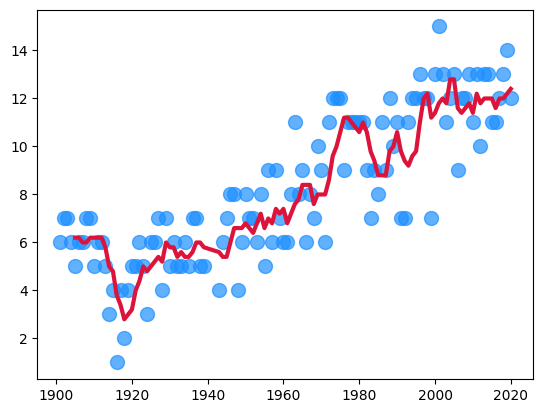

In [31]:
rolled_df=prize_by_year.rolling(window=5).mean()
plt.scatter(x=prize_by_year.index,y=prize_by_year.prize,
           c='dodgerblue',
           alpha=0.7,
           s=100)


plt.plot(prize_by_year.index,
         rolled_df.prize,
         c='crimson',
         linewidth=3)
plt.show()

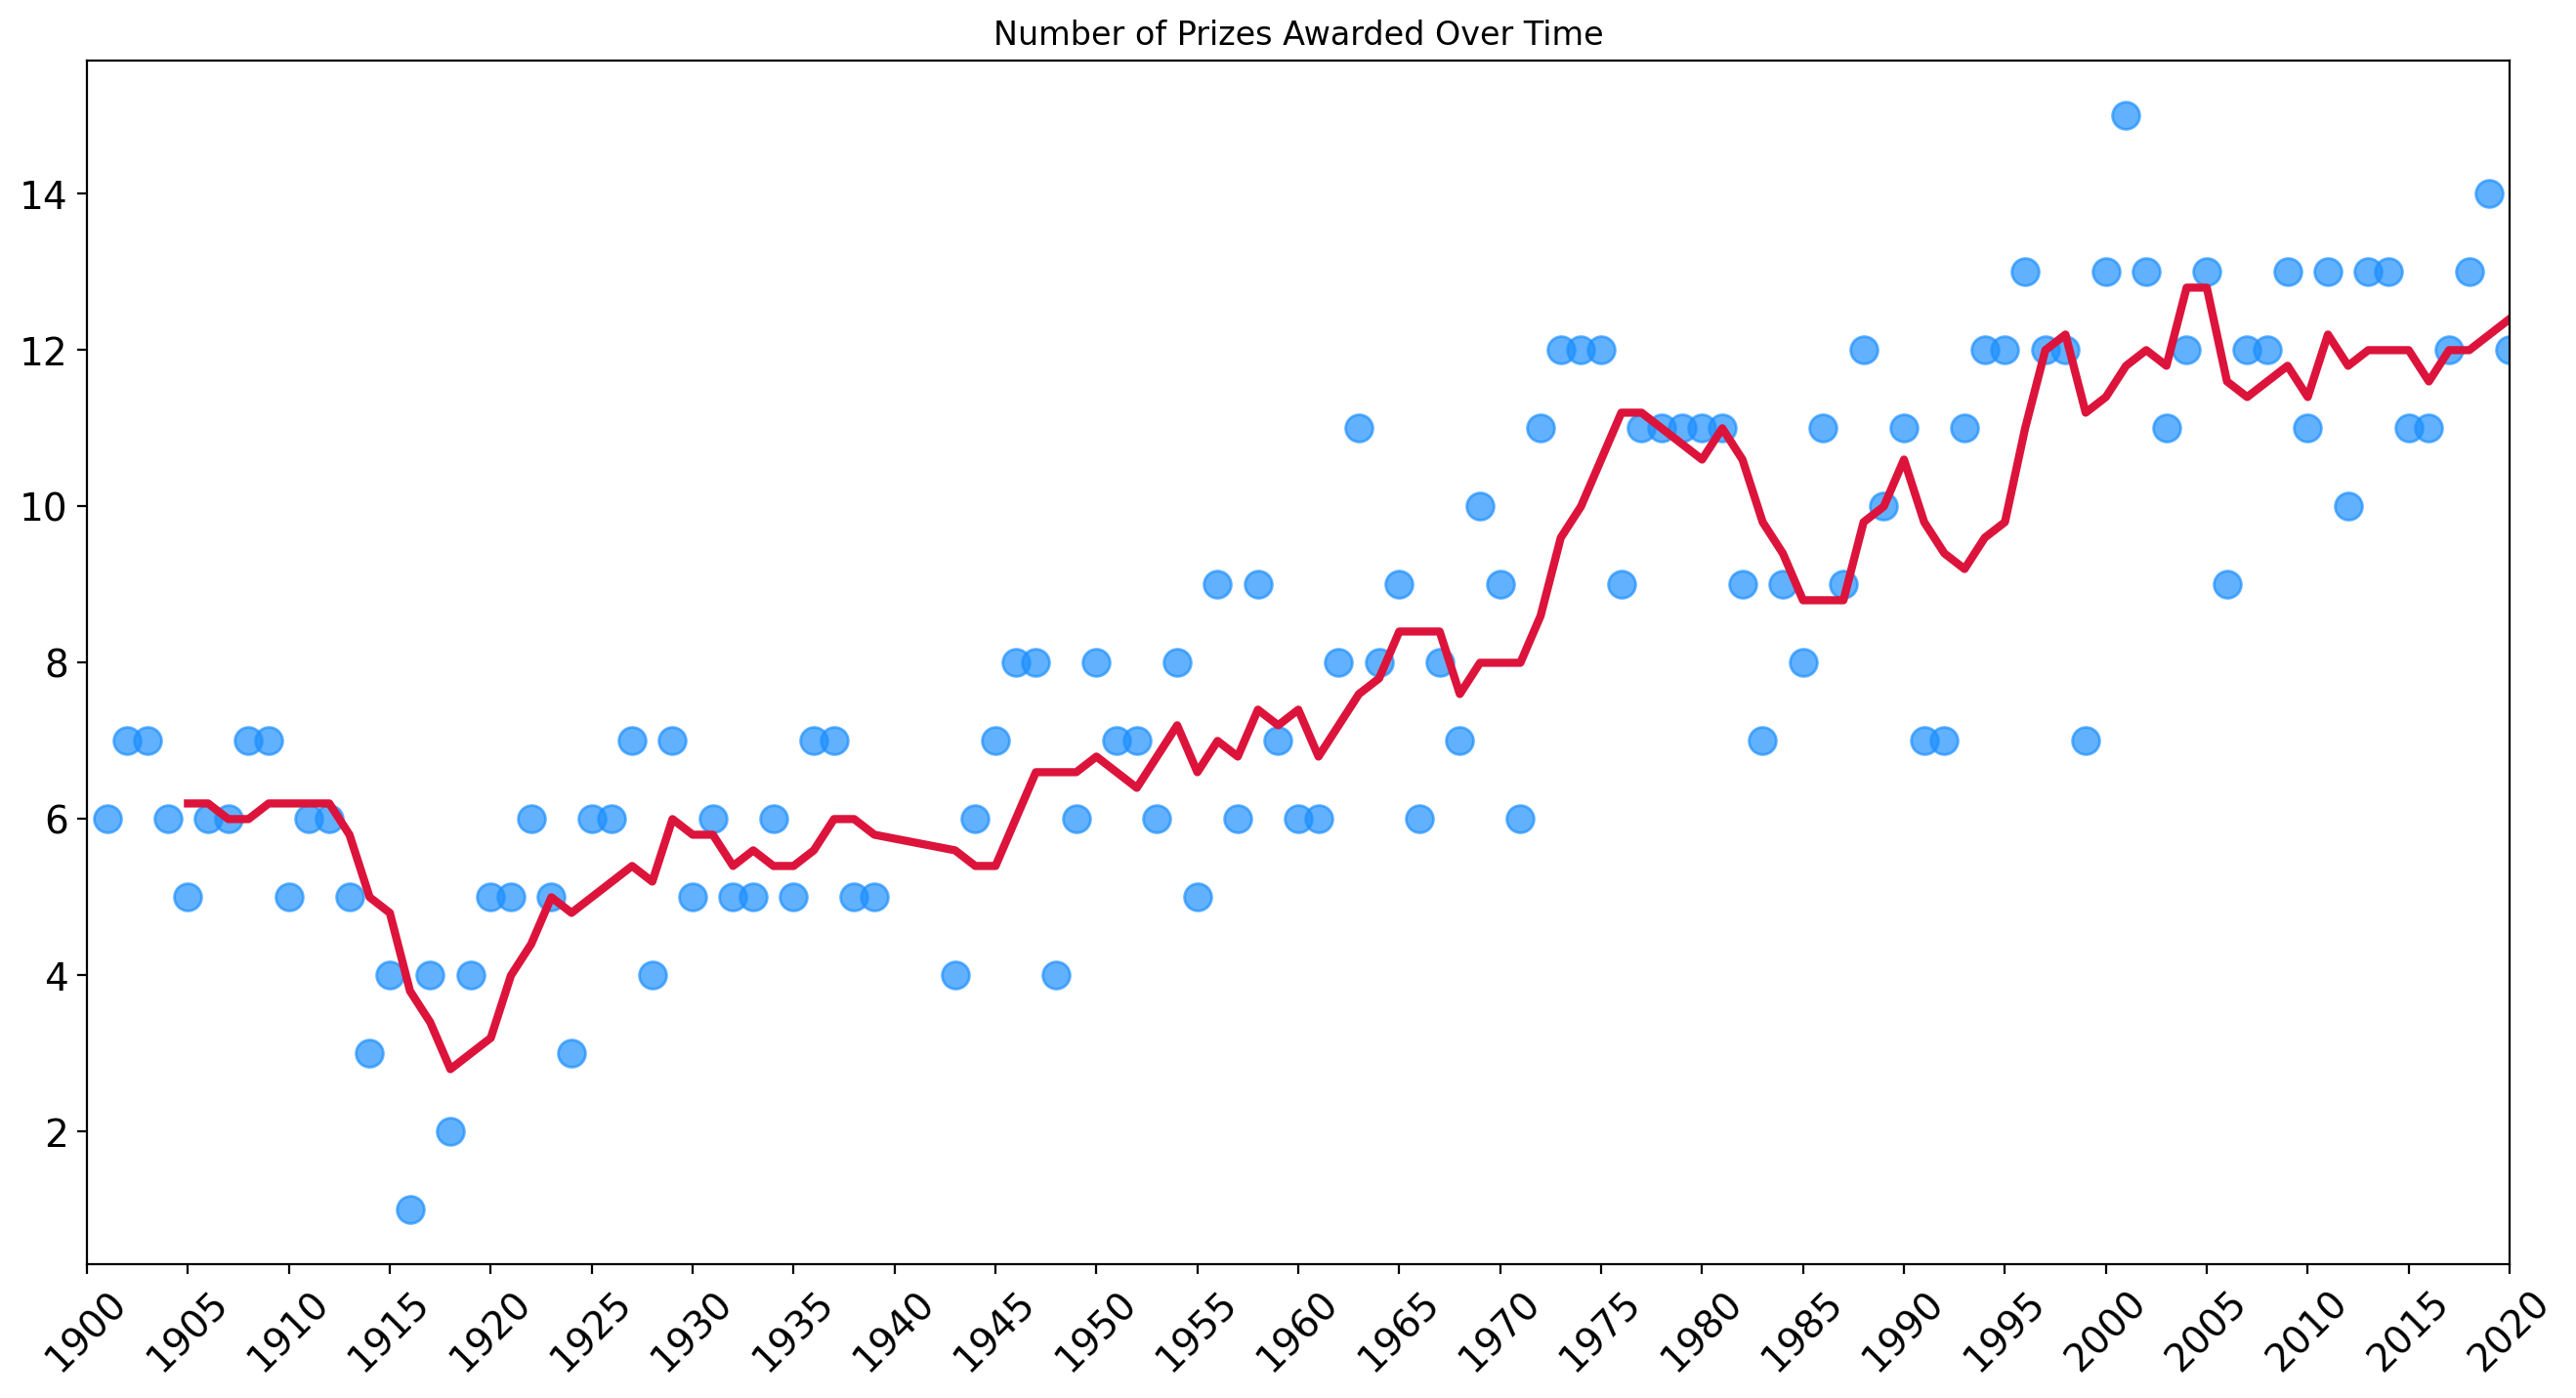

In [32]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of Prizes Awarded Over Time')
plt.xticks(ticks=np.arange(1900,2021,step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax=plt.gca()

ax.set_xlim(1900,2020)

ax.scatter(x=prize_by_year.index,y=prize_by_year.prize,
           c='dodgerblue',
           alpha=0.7,
           s=100)
ax.plot(prize_by_year.index,
         rolled_df.prize,
         c='crimson',
         linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?



In [33]:
yearly_avg_share=df_data.groupby('year').agg({'share_pct':pd.Series.mean})
yearly_avg_share

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00
...,...
2016,0.55
2017,0.50
2018,0.46


In [34]:
share_moving_avg=yearly_avg_share.rolling(window=5).mean()

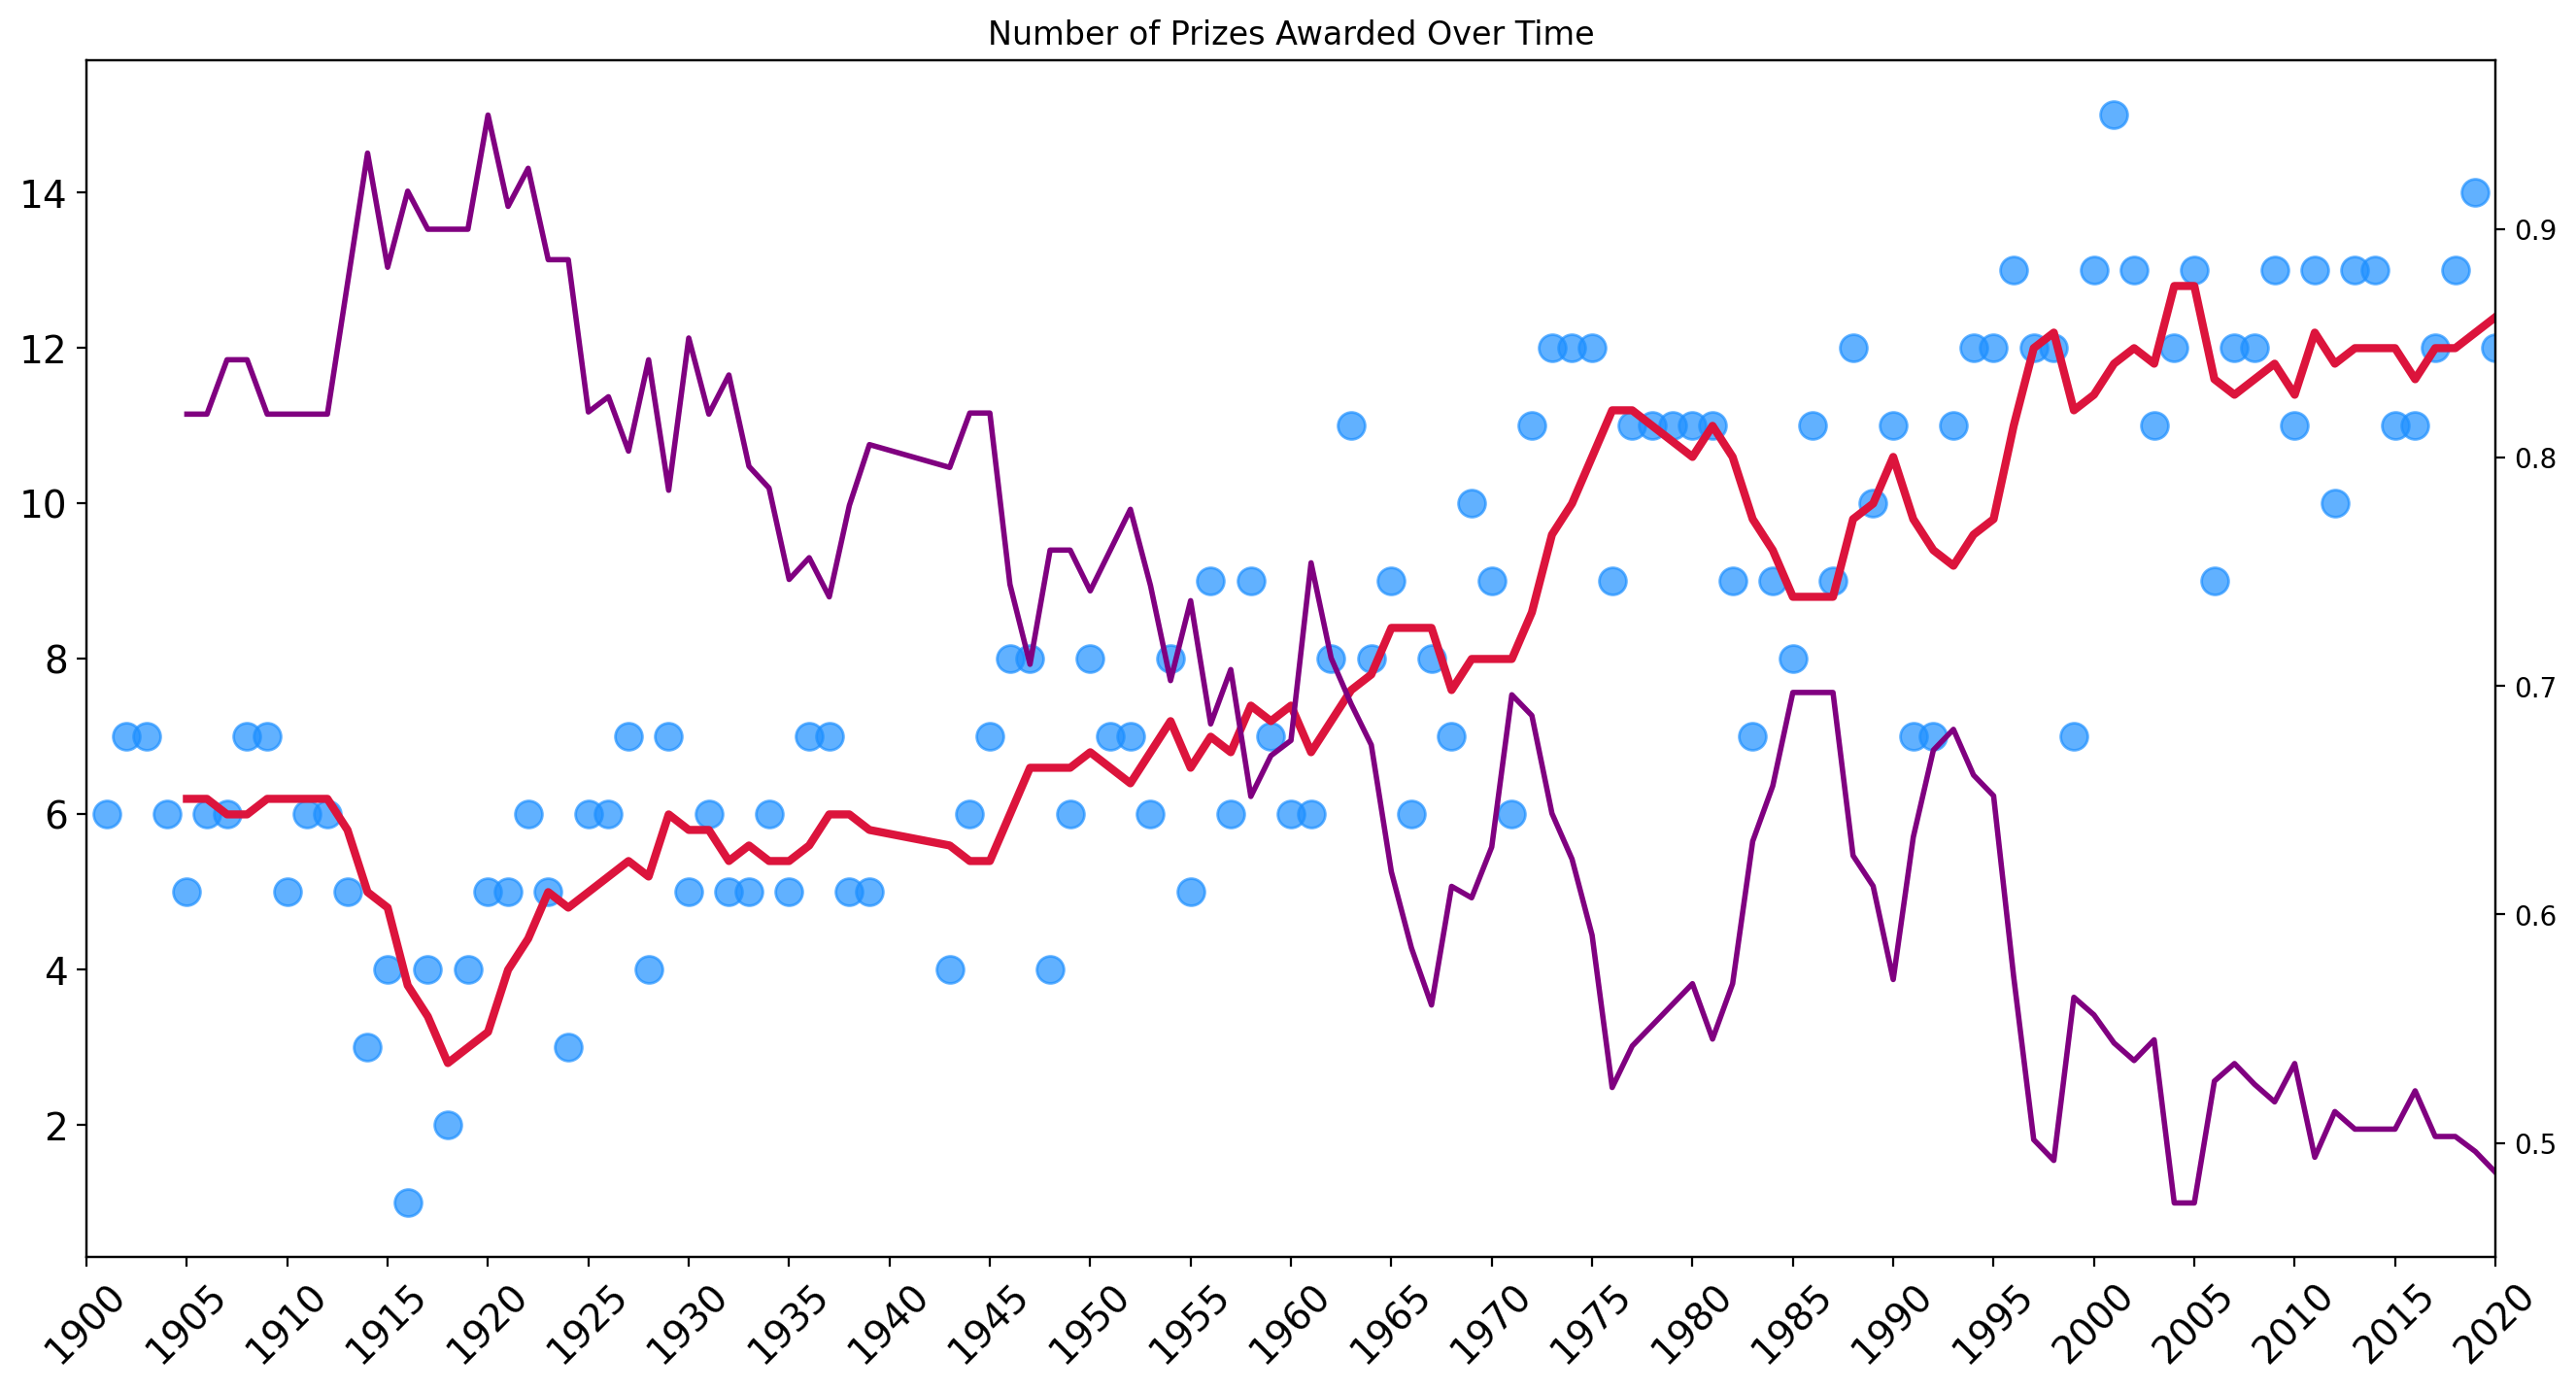

In [35]:
plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of Prizes Awarded Over Time')
plt.xticks(ticks=np.arange(1900,2021,step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax=plt.gca()
ax2=ax.twinx()


ax.set_xlim(1900,2020)

ax.scatter(x=prize_by_year.index,y=prize_by_year.prize,
           c='dodgerblue',
           alpha=0.7,
           s=100)
ax.plot(prize_by_year.index,
         rolled_df.prize,
         c='crimson',
         linewidth=3)

ax2.plot(yearly_avg_share.index,
        share_moving_avg.share_pct,
        c='purple',
        linewidth=2)

plt.show()

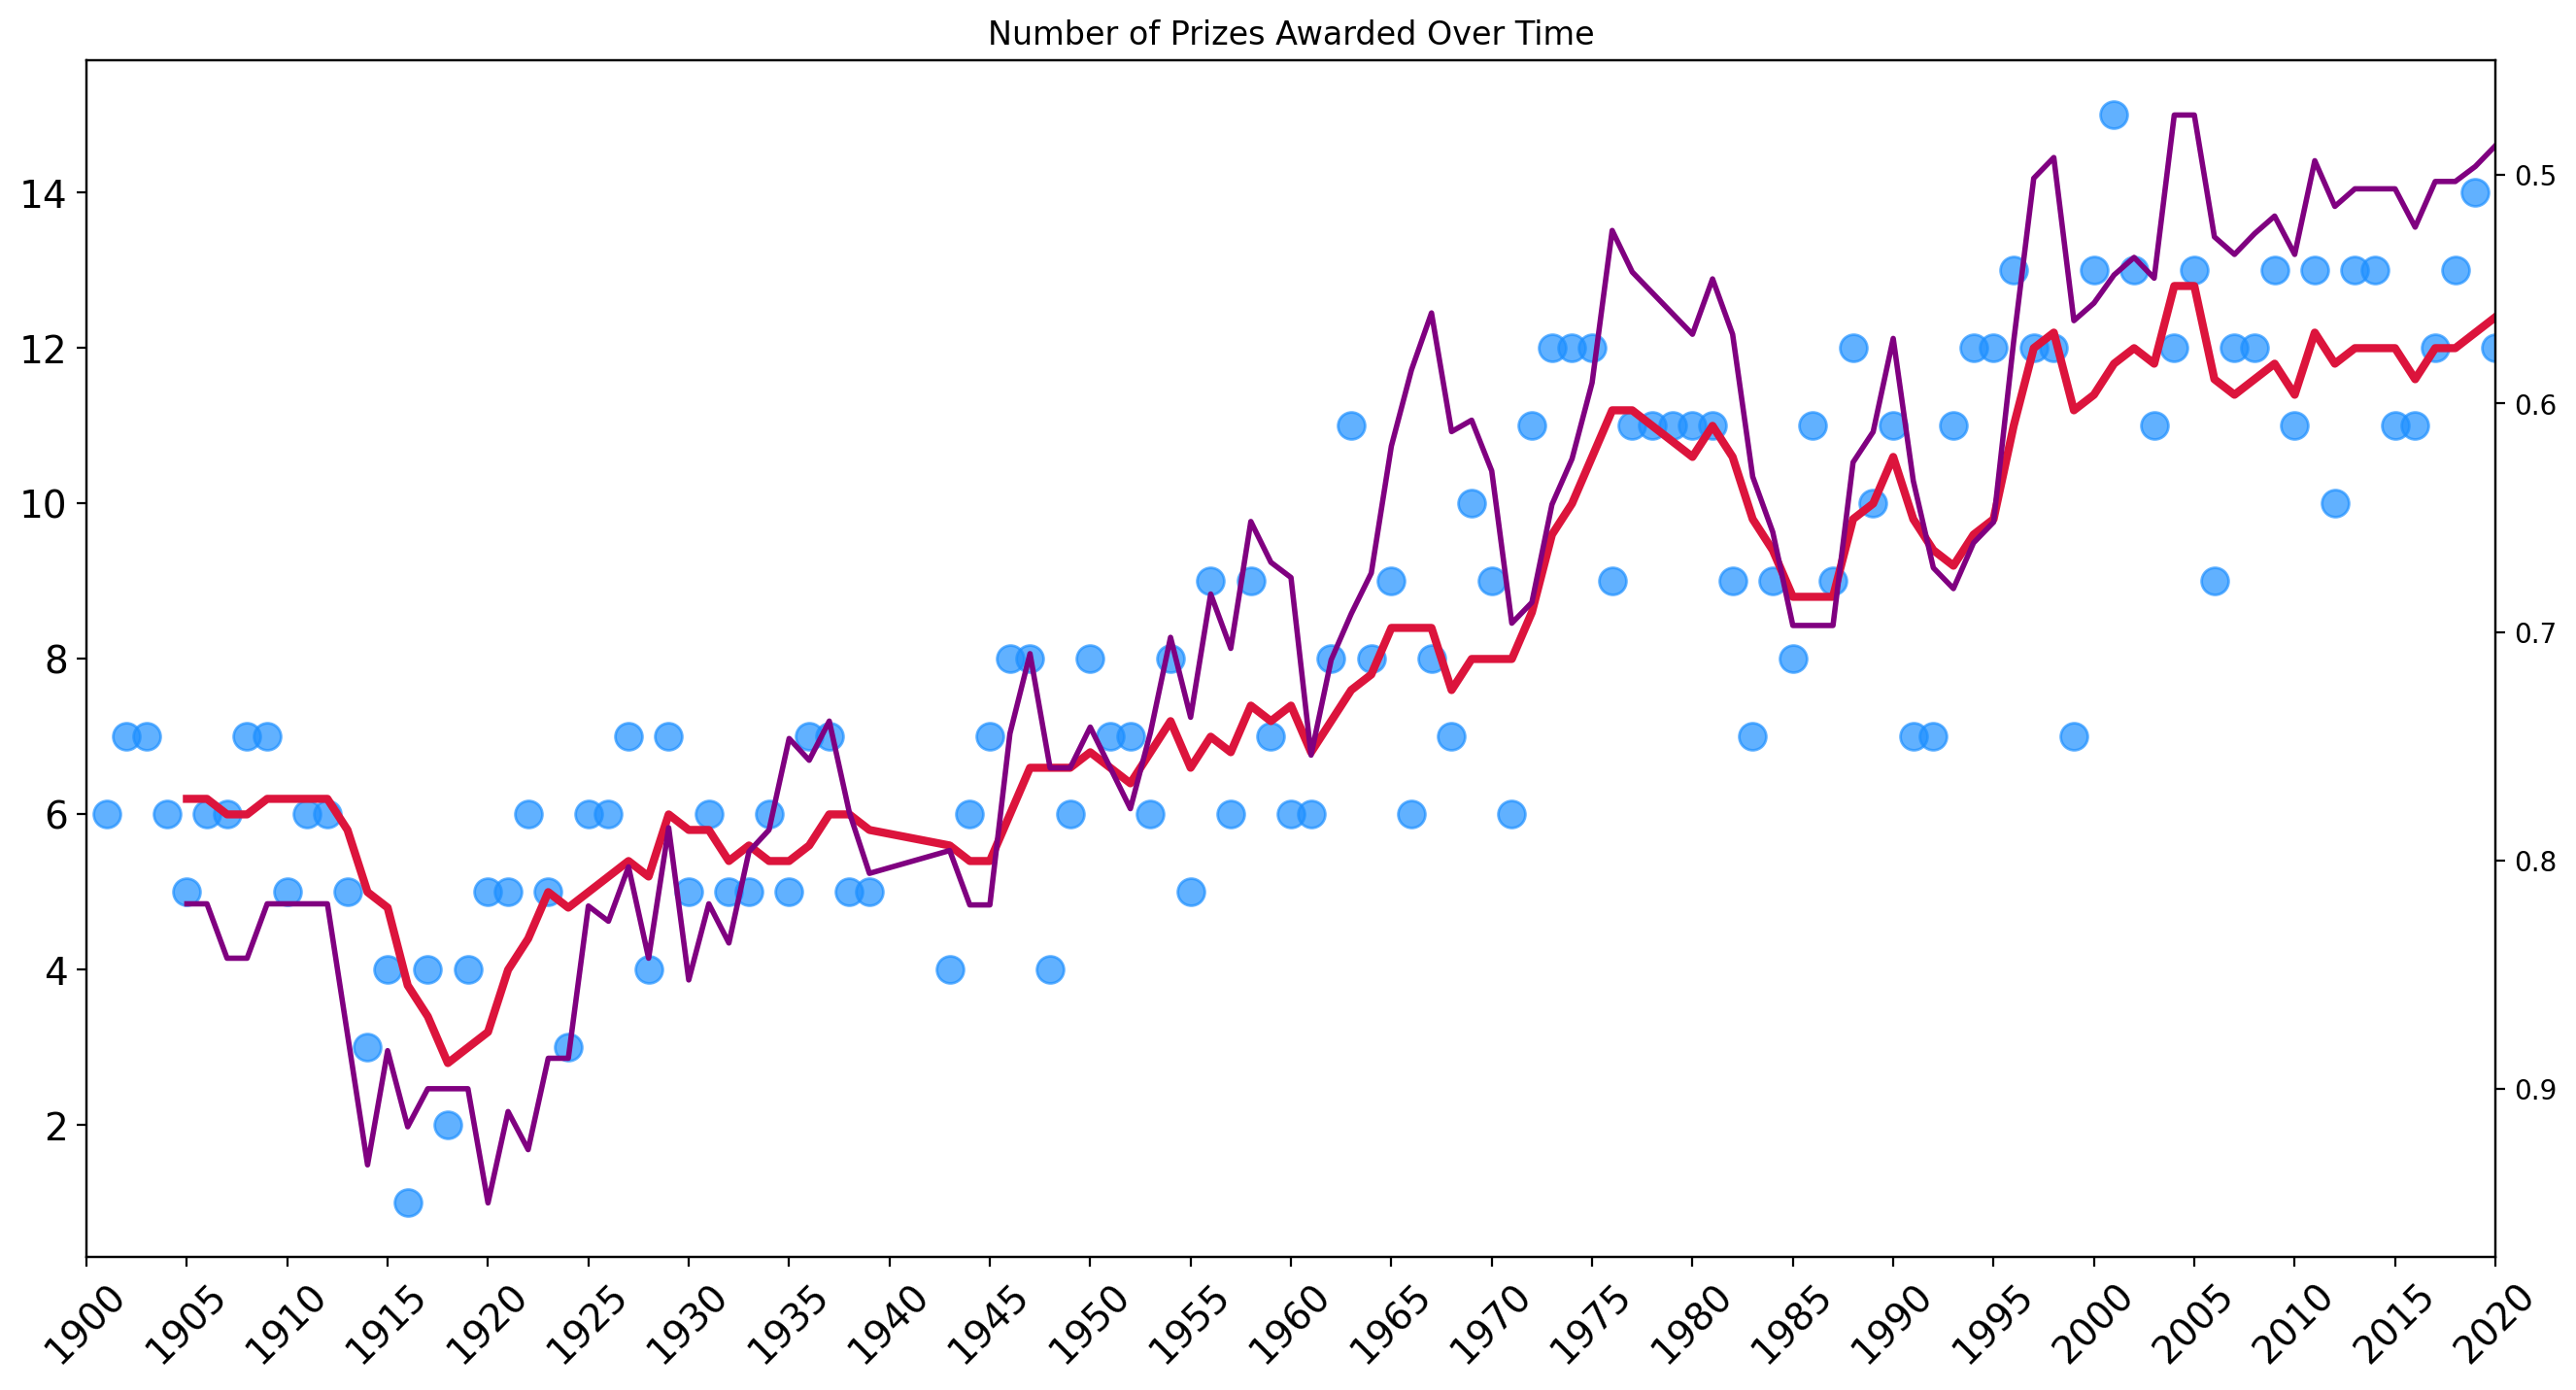

In [36]:
# inverting second y-axis

plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of Prizes Awarded Over Time')
plt.xticks(ticks=np.arange(1900,2021,step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

ax=plt.gca()
ax2=ax.twinx()

ax2.invert_yaxis()

ax.set_xlim(1900,2020)

ax.scatter(x=prize_by_year.index,y=prize_by_year.prize,
           c='dodgerblue',
           alpha=0.7,
           s=100)
ax.plot(prize_by_year.index,
         rolled_df.prize,
         c='crimson',
         linewidth=3)

ax2.plot(yearly_avg_share.index,
        share_moving_avg.share_pct,
        c='purple',
        linewidth=2)

plt.show()

# The Countries with the Most Nobel Prizes


* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [37]:
top20_countries=df_data.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count})
top20_countries.sort_values('prize',ascending=True,inplace=True)
top20_countries=top20_countries[-20:]

In [38]:
plt.figure(figsize=(8,4),dpi=200)
h_bar=px.bar(y=top20_countries.birth_country_current,x=top20_countries.prize,
             color=top20_countries.prize,
orientation='h')

h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Countries',
                    coloraxis_showscale=False)

h_bar.show()

<Figure size 1600x800 with 0 Axes>

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):



In [39]:
df_countries=df_data.groupby(['birth_country_current','ISO'],as_index=False).agg({'prize':pd.Series.count})
df_countries.sort_values('prize',ascending=True,inplace=True)
df_countries

,birth_country_current,ISO,prize
5,Bangladesh,BGD,1
4,Azerbaijan,AZE,1
10,Bulgaria,BGR,1
9,Brazil,BRA,1
15,Costa Rica,CRI,1
...,...,...,...
67,Sweden,SWE,29
25,France,FRA,57
26,Germany,DEU,84
73,United Kingdom,GBR,105


In [40]:
world_map=px.choropleth(df_countries,
                        locations='ISO',
                        color='prize',
                        hover_name='birth_country_current',
                        color_continuous_scale=px.colors.sequential.matter)



world_map.show()

# In Which Categories are the Different Countries Winning Prizes?


In [41]:
cat_country=df_data.groupby(['birth_country_current','category'],as_index=False).agg({'prize':pd.Series.count
                                                                                                            })
cat_country.sort_values('prize',ascending=False,inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [42]:
merged_df=pd.merge(cat_country,top20_countries,on='birth_country_current')
#changing column names
merged_df.columns=['birth_country_current','category','cat_prize','total_prize']
merged_df.sort_values('total_prize',ascending=True,inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
61,South Africa,Medicine,3,9
55,Hungary,Chemistry,3,9
58,South Africa,Peace,3,9
81,Hungary,Medicine,2,9
105,Hungary,Economics,1,9
...,...,...,...,...
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
9,United States of America,Peace,19,281
0,United States of America,Medicine,78,281


In [43]:
plt.figure(figsize=(16,8),dpi=200)
h1_bar=px.bar(y=merged_df.birth_country_current,x=merged_df.cat_prize,
             color=merged_df.category,
orientation='h',
              title='Top 20 countries by number of Prize and Category')

h1_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Countries',
                    coloraxis_showscale=False)

h1_bar.show()

<Figure size 3200x1600 with 0 Axes>

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [44]:
prize_by_country=df_data.groupby(['birth_country_current','year'],as_index=False).count()
prize_by_country

,birth_country_current,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,Algeria,1957,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
1,Algeria,1997,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Argentina,1936,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
3,Argentina,1947,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Argentina,1980,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,United States of America,2020,7,7,7,7,7,7,7,7,7,7,6,6,6,7,7
623,Venezuela,1980,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,Vietnam,1973,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
625,Yemen,2011,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [45]:
prize_by_country=prize_by_country.sort_values('year')[['year','birth_country_current','prize']]
prize_by_country

,year,birth_country_current,prize
312,1901,Netherlands,1
346,1901,Poland,1
118,1901,France,2
159,1901,Germany,1
440,1901,Switzerland,1
...,...,...,...
244,2019,India,1
221,2020,Germany,1
158,2020,France,1
533,2020,United Kingdom,2


In [46]:
#creating a series that has the cummulative sum for the number of prizes won

cummulative_prize=prize_by_country.groupby(['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cummulative_prize

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [47]:
cummulative_prize.reset_index(inplace=True)

In [48]:
cummulative_prize

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [49]:
l_chart=px.line(cummulative_prize,
                x='year',
                y='prize',
                hover_name='birth_country_current',
                color='birth_country_current'
                )

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of prizes')

l_chart.show()

# What are the Top Research Organisations?

Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:



In [50]:
research_org=df_data.groupby('organization_name').agg({'prize':pd.Series.count})
research_org.sort_values('prize',ascending=True,inplace=True)
research_org=research_org[-20:]


In [51]:
plt.figure(figsize=(16,8),dpi=200)
research_bar=px.bar(x=research_org.prize,
                    y=research_org.index,
                    orientation='h',
                    color=research_org.index,
                    hover_name=research_org.index)

research_bar.update_layout(
                           xaxis_title='Number of prizes',
                           yaxis_title='countries',
                           coloraxis_showscale=False,
                           title='Top Research Organisations')
research_bar.show()

<Figure size 3200x1600 with 0 Axes>

###Another approach

In [52]:
top_20_orgs=df_data.organization_name.value_counts()[:20]
top_20_orgs.sort_values(ascending=True,inplace=True)
top_20_orgs

,count
organization_name,
Institut Pasteur,7
London University,7
Harvard Medical School,7
University College London,7
Cornell University,8
Bell Laboratories,8
Yale University,9
MRC Laboratory of Molecular Biology,10
University of Oxford,12


In [53]:
plt.figure(figsize=(16,8),dpi=200)
research_bar=px.bar(x=top_20_orgs.values,
                    y=top_20_orgs.index,
                    orientation='h',
                    color=top_20_orgs.index,
                    hover_name=top_20_orgs.index)

research_bar.update_layout(
                           xaxis_title='Number of prizes',
                           yaxis_title='countries',
                           coloraxis_showscale=False,)
research_bar.show()

<Figure size 3200x1600 with 0 Axes>

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

In [54]:
research_city=df_data.groupby(['organization_name','organization_city'],as_index=False).agg({'prize':pd.Series.count})
research_city.sort_values('prize',ascending=True,inplace=True)
research_city=research_city[-20:]
research_city

,organization_name,organization_city,prize
83,Institut Pasteur,Paris,6
217,University of California,"Los Angeles, CA",6
98,Johns Hopkins University,"Baltimore, MD",6
181,Sorbonne University,Paris,7
113,London University,London,7
70,Harvard Medical School,"Boston, MA",7
43,Cornell University,"Ithaca, NY",8
284,Yale University,"New Haven, CT",9
115,MRC Laboratory of Molecular Biology,Cambridge,10
245,University of Oxford,Oxford,12


In [55]:
plt.figure(figsize=(16,8),dpi=200)
city_bar=px.bar(x=research_city.prize,
                    y=research_city.organization_city,
                    orientation='h',
                    color=research_city.organization_name,
                    hover_name=research_city.organization_name)

city_bar.update_layout(
                           xaxis_title='Number of prizes',
                           yaxis_title='countries',
                           coloraxis_showscale=False,)
city_bar.show()

<Figure size 3200x1600 with 0 Axes>

# Plotly Sunburst Chart: Combine Country, City, and Organisation

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?



In [56]:
country_city_org=df_data.groupby(['organization_country','organization_city','organization_name'],as_index=False).agg({'prize':pd.Series.count})
country_city_org=country_city_org.sort_values('prize',ascending=False)

In [57]:
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
8,Austria,Innsbruck,Innsbruck University,1
6,Austria,Altenberg; Grünau im Almtal,Konrad-Lorenz-Institut der Österreichischen Ak...,1
5,Australia,Weston Creek,Australian National University,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


In [58]:
burst=px.sunburst(country_city_org,
                  path=['organization_country','organization_city','organization_name'],
                  values='prize',
                  title='Where do discoveries takes place?')

burst.update_layout(xaxis_title='Number pf prize',
                    yaxis_title='City',
                    coloraxis_showscale=False)
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [59]:
birth_years=df_data.birth_date.dt.year
df_data['winning_age']=df_data.year-birth_years

### Who were the oldest and youngest winners?



In [60]:
display(df_data.nlargest(n=1,columns='winning_age'))  # equivalent to df.sort_values(columns, ascending=False).head(n)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [61]:
display(df_data.nsmallest(n=1,columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [62]:
df_data.winning_age.describe(

)

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


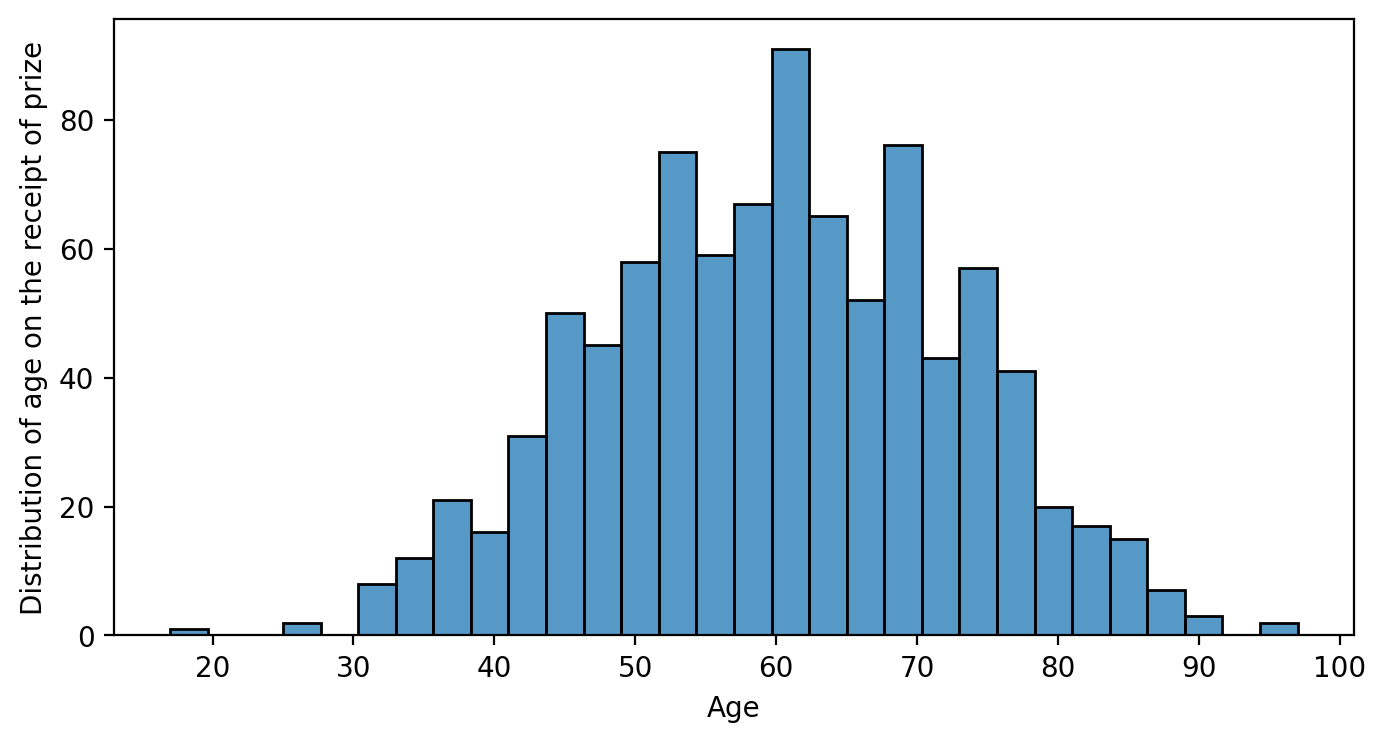

In [63]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age'),
plt.ylabel('Distribution of age on the receipt of prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?



* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


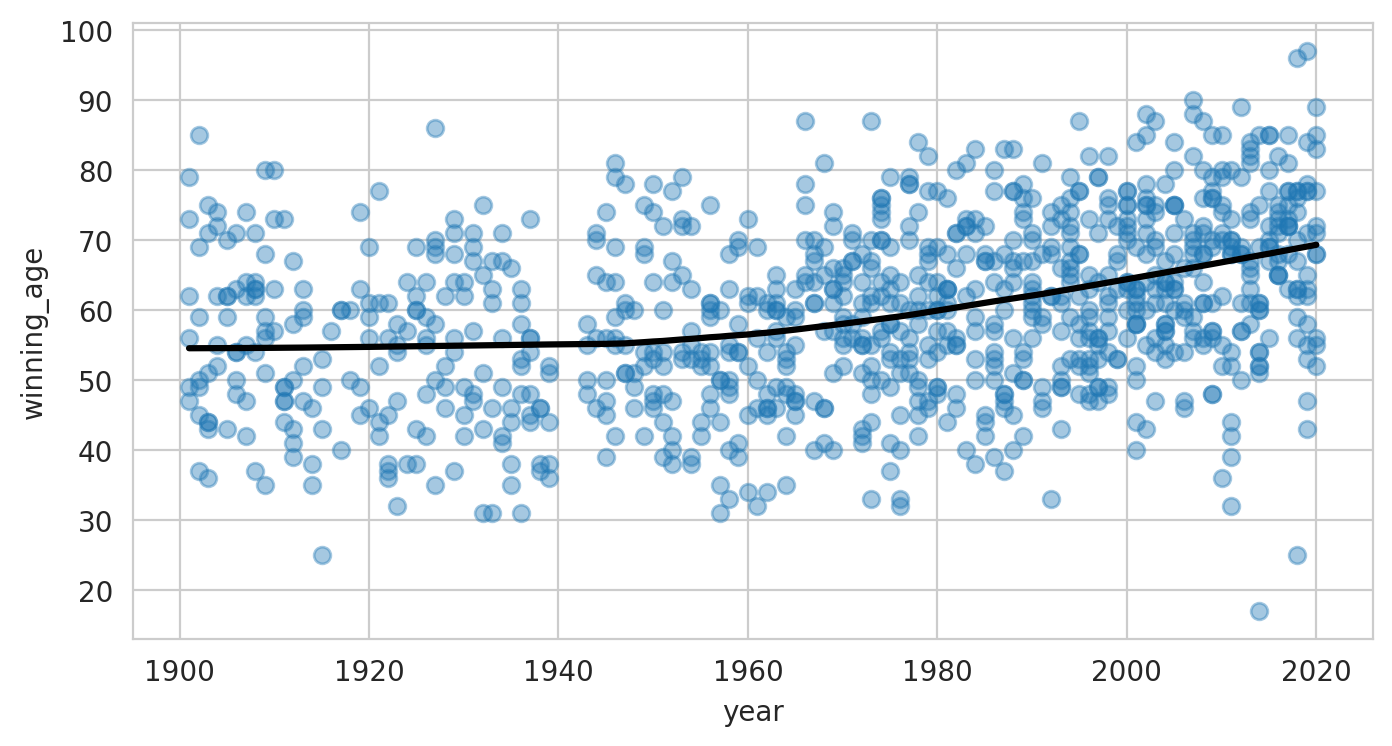

In [64]:
plt.figure(figsize=(8,4),dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=df_data,
              x='year',
              y='winning_age',
              lowess=True,
              scatter_kws={'alpha':0.4},
              line_kws={'color':'black'})

  plt.show(

  )

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

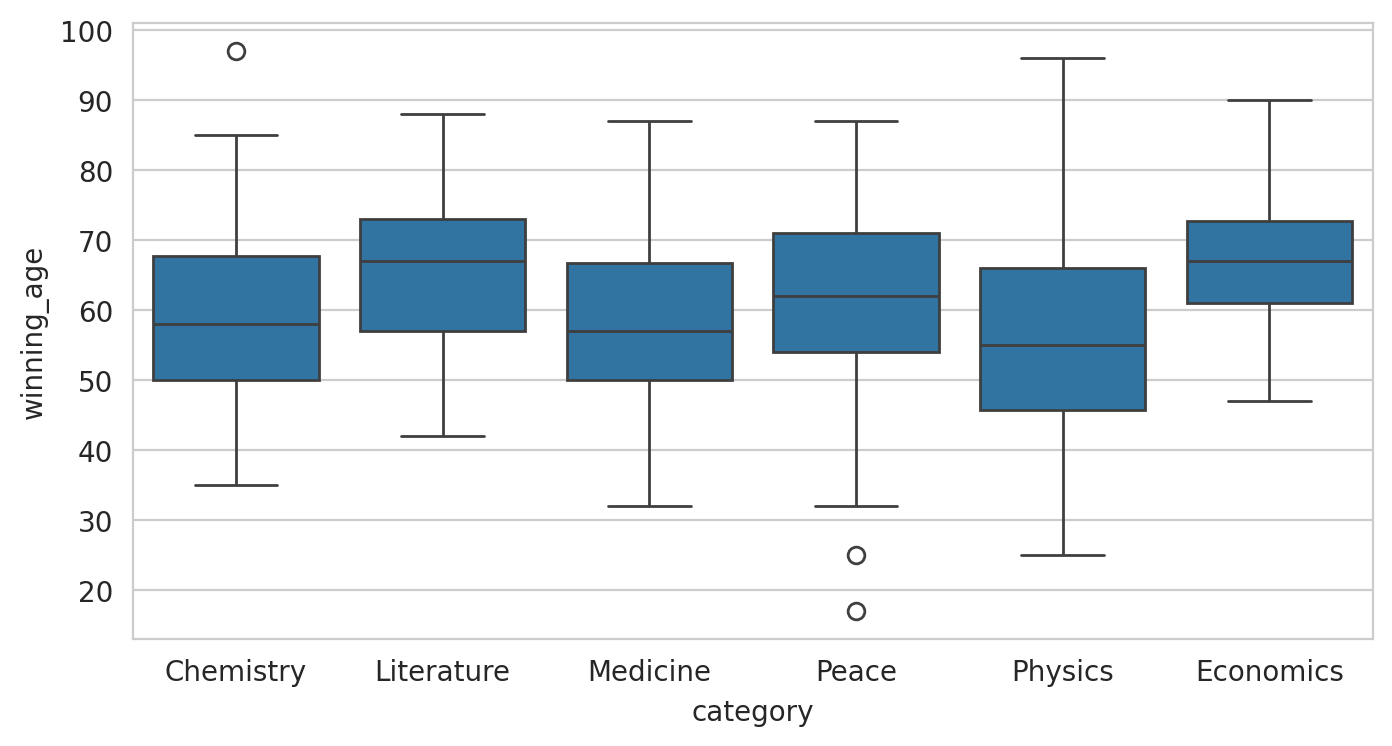

In [65]:
plt.figure(figsize=(8,4),dpi=200)

with sns.axes_style('whitegrid'):
  sns.boxplot(data=df_data,
              x='category',
              y='winning_age')

plt.show()


* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


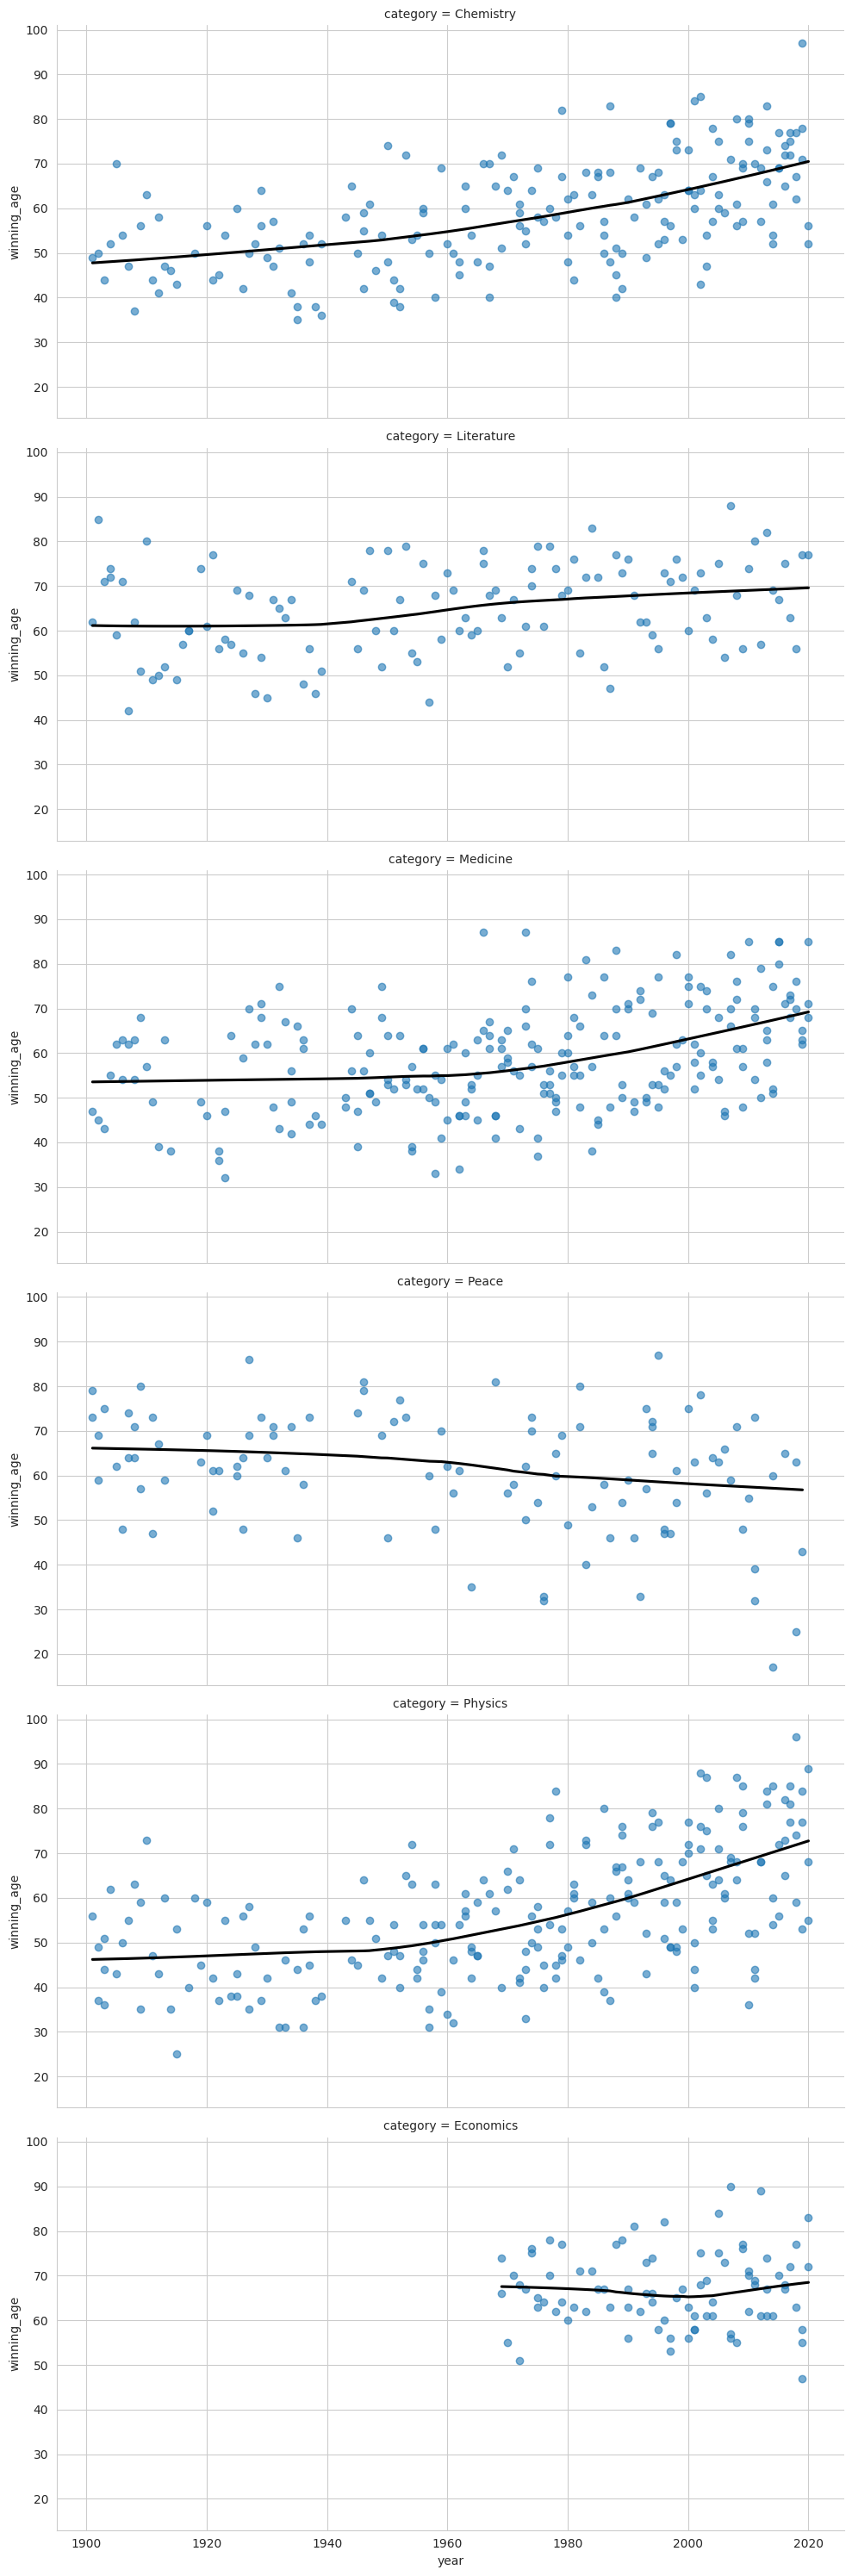

In [66]:
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             x='year',
             y='winning_age',
             row='category',
             lowess=True,
             aspect=2,
             scatter_kws={'alpha':0.6},
             line_kws={'color':'black'})

plt.show()

In [67]:
#combining these charts

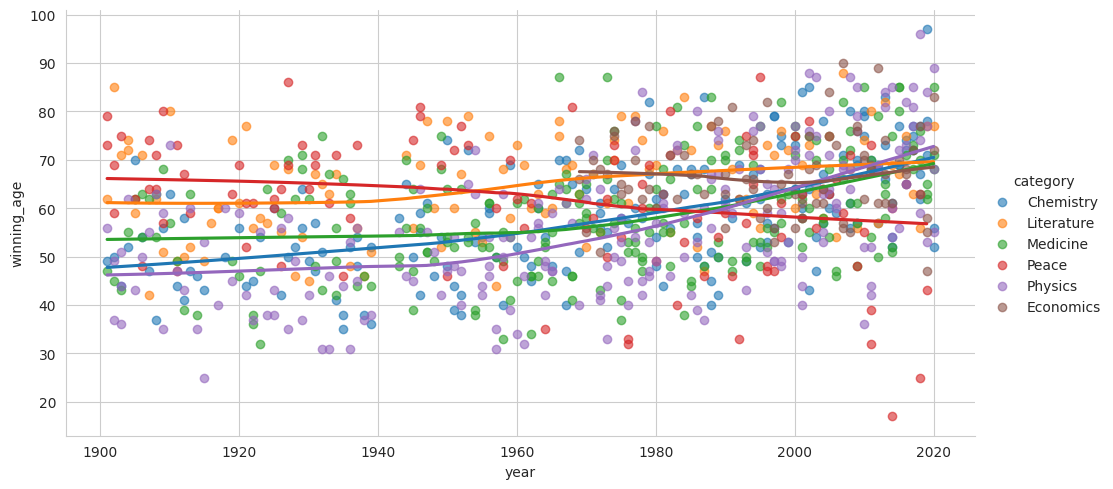

In [68]:
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             x='year',
             y='winning_age',
             hue='category',
             lowess=True,
             aspect=2,
             scatter_kws={'alpha':0.6},
             )

plt.show()